-2.5


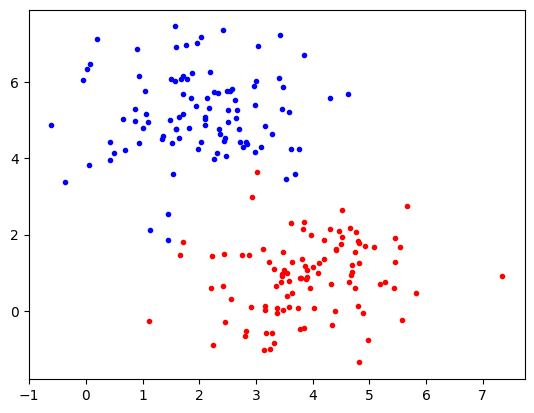

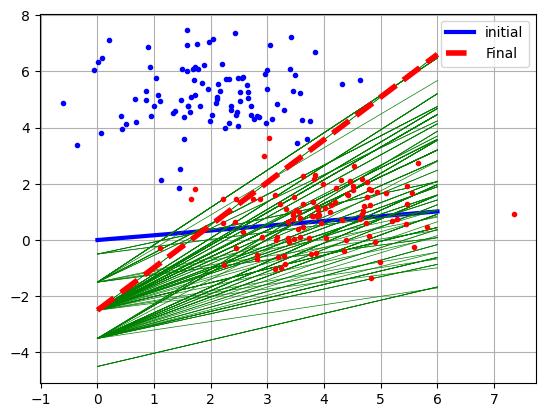

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_biclusters, make_blobs
from sklearn import model_selection

minxc1 = 2
maxxc1 = 5
minxc2 = 4
maxxc2 = 1

c1 = np.array(np.random.standard_normal((100,2)))+(minxc1,maxxc1)
c2 = np.array(np.random.standard_normal((100,2)))+(minxc2,maxxc2)
yc1 = np.ones((100,1), dtype=np.int32)
yc2 = np.zeros((100,1),dtype=np.int32)
Y = np.concatenate((yc1,yc2),axis=0)
X = np.concatenate((c1,c2),axis=0)
xtrain, xtest ,ytrain, ytest = model_selection.train_test_split(X,Y,test_size=0.1)
plt.plot(c1[:,0], c1[:,1], 'b.')
plt.plot(c2[:,0], c2[:,1], 'r.')

def hardlim(z ):
  if z <0:
    return 0
  else:
    return 1

def trainw(w , x ,y,b, alpha = 0.01):
  prediction = hardlim(x.dot(w.T)+b)
  #print(prediction)
  error = (y - prediction )
  #print(error)
  if error!=0 :
    w = w + alpha *(error * x)
    b = b + error

  return w,b

weights = np.random.rand(1,2)

line = np.arange(np.min([minxc1,minxc2], axis=0)-2, np.max([maxxc1, maxxc2],axis=0)+2)
fig, ax = plt.subplots()
slop = weights[0,1]/ weights[0,0]
b =0.5
ax.plot(line ,slop*line,'b', linewidth=3 ,label="initial")
for i in range (len(xtrain)):
  (weights,b ) =trainw(weights , xtrain[i,:], ytrain[i,0],b )
  #print(b)
  slop = weights[0,1]+0.1/ weights[0,0]
  plt.plot(line ,(slop*line)+b,'g', linewidth=0.5 )

plt.plot(c1[:,0], c1[:,1], 'b.')
plt.plot(c2[:,0], c2[:,1], 'r.')
plt.plot(line, (slop*line)+b,'r--', linewidth=4,label="Final")
print(b)
plt.legend()
plt.grid()